# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [18]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [19]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [20]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations in our dataset.

#### Question 2. Create a summary table

In [21]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a large range, so the data will have more variance.

#### Question 4. Drop data points with missing data


In [23]:
df = df_raw.dropna()

In [28]:
#df = pd.value_counts(df['gre']).to_frame().reset_index()
#df

#df.columns = ['GRE value','Count']

grouped = pd.pivot_table(combos, values=['admit_pred'], index=['prestige'],
                            aggfunc=np.mean)
print grouped.head()

NameError: name 'combos' is not defined

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [12]:
df_raw.notnull().any() #No null values showed here.

admit       True
gre         True
gpa         True
prestige    True
dtype: bool

Answer: You can tell because .notnull() was true for each data type.  Also, we know the data starts with 400 observations, anda after we drop the null values, there are only 398 observations.  398 is the number of observations for the smallest data set variables, GPA and GRE.

#### Question 6. Create box plots for GRE and GPA

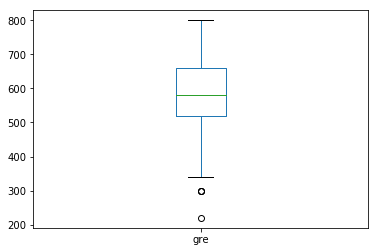

In [13]:
#boxplot 1
df_raw[['gre']].plot(kind='box');

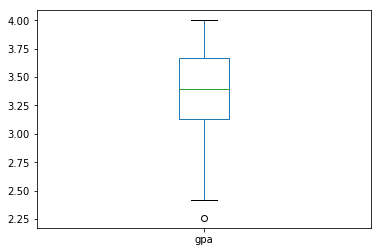

In [14]:
#boxplot 2 
df_raw[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: The GRE boxplot shows that the minimum value is just above 200 (outlier), and the maximum value is 800.  Q2 is around 500, and Q3 is around 630.  There are multiple outliers between 210 and 300.

The GPA boxplot shows a minimum of around 2.25 (outlier) and a maximum of 4.00.  There are outliers at 2.25.  The mean is around 2.33.  Q2 is around 3.15 and Q3 is around 3.60.

#### Question 8. Describe each distribution 

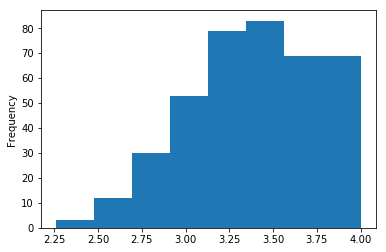

In [15]:
# plot the distribution of each variable 
df_raw['gpa'].plot(kind='hist', bins = 8)

Answer: The above distribution is skewed to the left.  The mean and median are close together around 3.40.

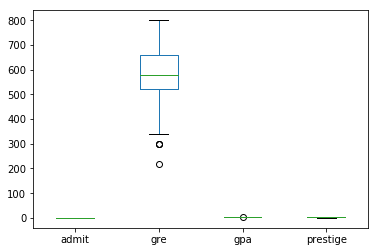

In [16]:
df_raw.plot.box()

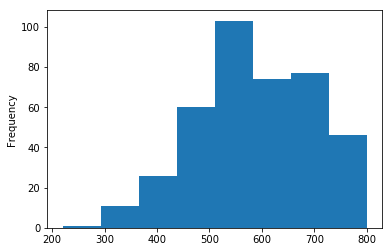

In [17]:
df_raw['gre'].plot(kind='hist', bins = 8)

Answer: GRE distribution is skewed to the left.  The mean is between 500 and 600 based on this plot.

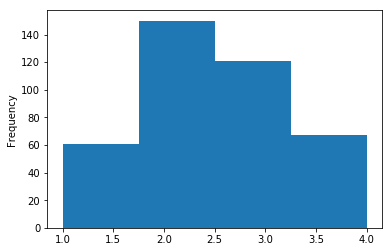

In [18]:
df_raw['prestige'].plot(kind='hist', bins=4)

Answer: GPA is skewed to the right.  

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. None of these follow the normal distribution.  They are all skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:  Yes.  Outliers need to be removed and the distributions need to be normalized.

#### Question 11. Which of our variables are potentially colinear? 

In [19]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE have the strongest positive correlation.  This means that it is more likely that if you have a high GPA that you will also have a high GRE score.  Prestige and admit have the strongest negative correlation.  That means the more prestiguous the institution, the less likely you will get in.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Organize and clean the data.
2. Look at the basic statistics of the data (non-graphical).
3. Plot the data to find the distribution.
4. Look for any outliers then remove them.
5. Re-run any basic statistics, and then use the data to answer your hypothesis or problem statement.

#### Question 14. What is your hypothesis? 

Answer: The more prestigous the school, the harder it is to get in.  Students with high GPA and high GRE scores are more likely to be admitted into the most prestigous schools.  Students with low GPA and low GRE scores are less likely to be admitted into the most prestigous schools and have a better chance at being admitted into a school with lower prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

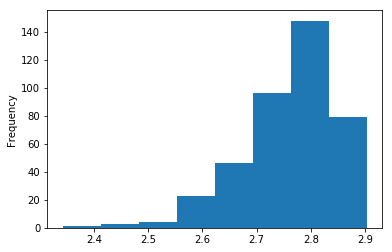

In [28]:
# very important
#df_raw['lognorm'] = np.log(df_raw['norm'])
#log_transformed = (df_raw+1).apply(np.log) 
#log_transformed['gre'].hist(figsize = (8,8),          # Plot histogram
  #               bins=50)   

#log_transformed['gre'].plot(kind='hist', bins=8)
log_transformed = df_raw.apply(np.log10)
log_transformed['gre'].plot(kind='hist', bins=8)

#### 3. Advanced: Impute missing data

In [21]:
#not as important as 2 but second most important
i_df_raw = df_raw.fillna(df_raw.mean(), inplace=True)

In [22]:
i_df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [23]:
gre = i_df_raw['gre']
gre_transformed = np.log10(gre)
gpa = i_df_raw['gpa']
gpa_transformed = np.log10(gpa)
prestige = i_df_raw['prestige']
prestige_transformed = np.log10(prestige)

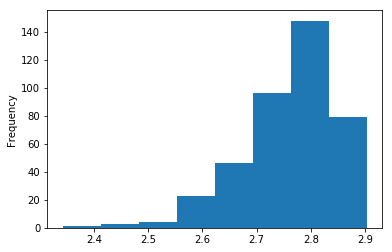

In [24]:
#log_transformed = (df_raw+1).apply(np.log) 
#transformed['gre'].hist(figsize = (8,8),          # Plot histogram
 #                bins=50)   

gre_transformed.plot(kind='hist', bins=8)
#log_transformed['gre'].plot(kind='hist', bins=8)

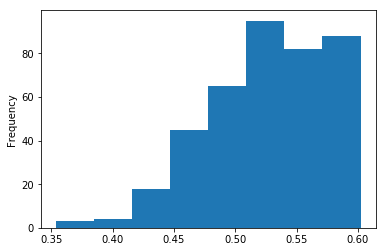

In [25]:
gpa_transformed.plot(kind='hist', bins=8)

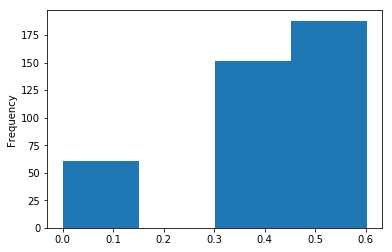

In [26]:
prestige_transformed.plot(kind='hist', bins=4)